<a href="https://colab.research.google.com/drive/1vurL9SNjXCWP_CXJ6br9Ho1saNS2yPeX?usp=sharing"
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Training Neural Network to classify cats and dogs with augmentation of images**
Write an algorithm to classify whether images contain either a dog or a cat. You'll follow these steps:

    1) Explore the example Data of Cats and Dogs and Build and Train a Neural Network to recognize the difference between the two

    2) Create convolutional neural network(filter/reduce image) layers that trains the accuracy on these images. 
      Convd2D layers for 32, 64,128,128 with a 3x3 filter and epochs = 10. Pooling(compress/reduce)2x2 layer. 
      Dropout 0.5, Dense layers 512 and 1 neuron. Activation relu and sigmoid

    3) Evaluate the Training and Validation accuracy
    
    4) Plot Training/Validation Accuracy and loss for the model.
       Retrieve training and validation accuracy for epoch
       Plot training and validation accuracy for epoch
       Plot training and validation loss for epoch

### **Import and load data**
- The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [7]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()



--2020-11-25 15:24:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   264MB/s    in 0.2s    

2020-11-25 15:24:26 (264 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



#### **Before we build(layers) compile neural network, let's do the folowing**
- Define each of these directories(path/location): **Note**, there are two subdirectories **train and validation**
- let's see what the filenames look like in the dogs and cat training directories:
- The total number of cats and dogs images in the directories:

### **Proprocessing data for training and validation**
- The **training set data** tells the neural network model that 'this is what a cat looks like', 'this is what a dog looks like' etc.

- The **validation data set** is images of cats and dogs that the neural network will not see as part of the training, so you can test how well or how badly it does in evaluating if an image contains a cat or a dog.

In [9]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [10]:
#The total number of cats and dogs images in the directories
print('total training cat pics:', len(os.listdir(train_cats_dir ) ))
print('total training dog pics :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat pics :', len(os.listdir(validation_cats_dir ) ))
print('total validation dog pics :', len(os.listdir(validation_dogs_dir ) ))

total training cat pics: 1000
total training dog pics : 1000
total validation cat pics : 500
total validation dog pics : 500


For both cats and dogs, we have 1,000 training images and 500 validation images.
### **Visualization of cat vs dog**
Using matplotlib let's take a look at a few pictures to get a better sense of what they look like:
- Import libraries
- Create function(load_image) to load images from training cat folder


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import os
import random

In [28]:
# load single image from training cat folder
def load_image(dir):
  for img in os.listdir(train_cats_dir):
    print('Image is: ',img)
    image = cv.imread(os.path.join(train_cats_dir,img))
    break
  return image


**Single Cat Image**
- Dimensions in height x width
- Maximum pixel value/-Minimum pixel value
- Mean pixel value/- standard deviation of image 

Image is:  cat.911.jpg
The Dimensions are: (495, 370, 3)
The Maximum pixel value is: 255.00
The Minimum pixel value is: 0.00
The Standard Deviation is: 45.99


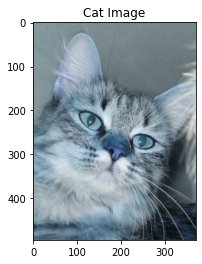

In [29]:
train_cats_dir = os.path.join(train_dir, 'cats')

image = load_image(os.path.join(train_dir,'cats'))
plt.imshow(image, cmap='gray')
plt.title("Cat Image")
print(f"The Dimensions are: {image.shape}")
print(f"The Maximum pixel value is: {image.max():.2f}")
print(f"The Minimum pixel value is: {image.min():.2f}")
print(f"The Standard Deviation is: {image.std():.2f}")

Create function(load_image) to load images from training dog folder
**Single Dog Image**
- Dimensions in height x width
- Maximum pixel value/-Minimum pixel value
- Mean pixel value/- standard deviation of image 

In [39]:
def load_image(dir):
  for img in os.listdir(train_dogs_dir):
    print("Image is: ",img)
    image = cv.imread(os.path.join(train_dogs_dir,img))
    break
  return image

Image is:  dog.186.jpg
The Dimensions are: (374, 500, 3)
The Maximum pixel value is: 255.00
The Minimum pixel value is: 0.00
The Standard Deviation is: 64.91


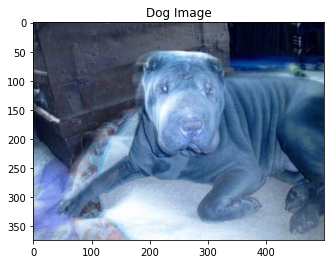

In [48]:
train_dogs_dir = os.path.join(train_dir, 'dogs')

image = load_image(os.path.join(train_dir,'dogs'))
plt.imshow(image, cmap='gray')
plt.title("Dog Image")
print(f"The Dimensions are: {image.shape}")
print(f"The Maximum pixel value is: {image.max():.2f}")
print(f"The Minimum pixel value is: {image.min():.2f}")
print(f"The Standard Deviation is: {image.std():.2f}")

### load nine random images from cats and dogs directory

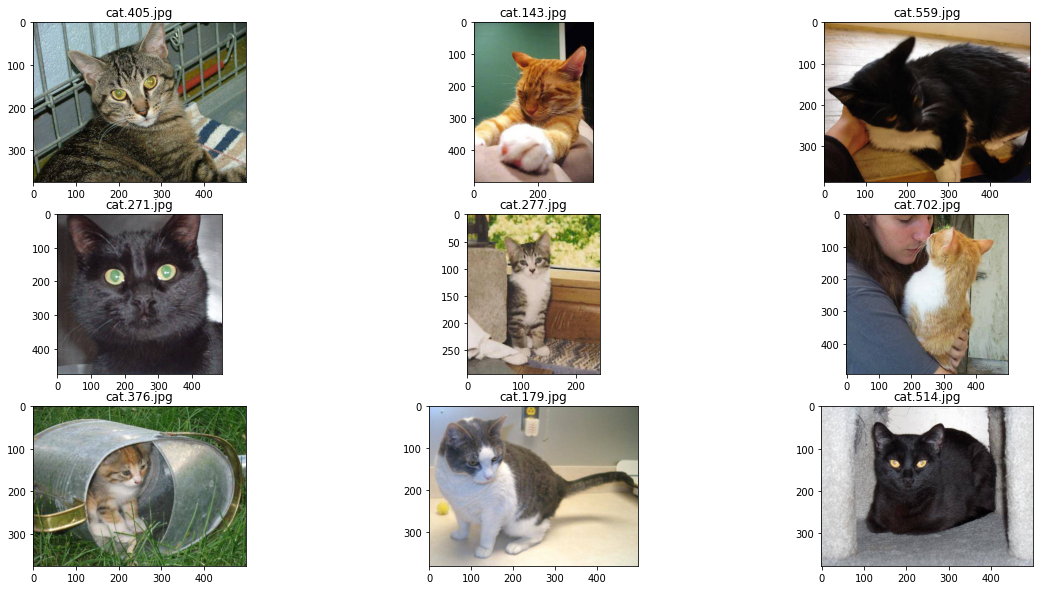

In [49]:
# load nine random cat images
plt.figure(figsize=(20,10))
train_cats_dir = os.path.join(train_dir, 'cats')

# iterate througe nine images
for i in range(9):
    file = random.choice(os.listdir(train_cats_dir))
    image_path= os.path.join(train_cats_dir, file)
    image=mpimg.imread(image_path)
    ax=plt.subplot(3, 3, i + 1)
    ax.title.set_text(file)
    plt.imshow(image)

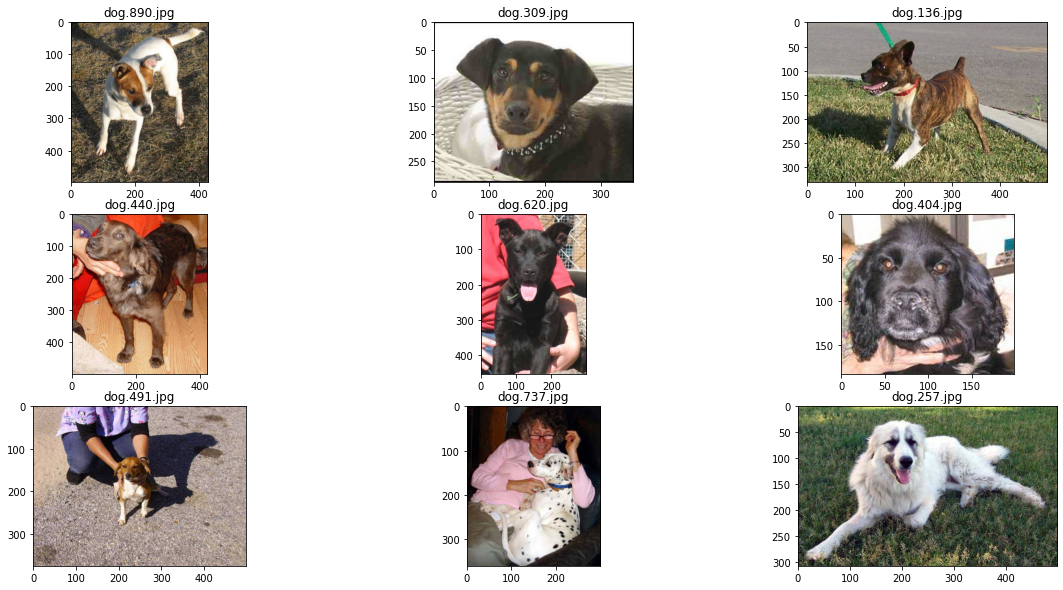

In [50]:
# load nine random dog images
plt.figure(figsize=(20,10))
train_dogs_dir = os.path.join(train_dir, 'dogs')

# iterate througe nine images
for i in range(9):
    file = random.choice(os.listdir(train_dogs_dir))
    image_path= os.path.join(train_dogs_dir, file)
    image=mpimg.imread(image_path)
    ax=plt.subplot(3, 3, i + 1)
    ax.title.set_text(file)
    plt.imshow(image)

### **Build (layers)compile neural network model**
    Sequential: defines a SEQUENCE of layers in the neural network.
    Conv2D: Isolate(filter) images. Conv2D filter = output 26x26 image.
    Pooling: reduce(compress) image. MaxPooling2D 26x26-2x2 filter = output 13x13
    Flatten: turns square image to 1 dimension. Dense: adds a layer of neurons
    Dropout: removal of random layer of neurons, speeds up network
    Sigmoid: network predict values between 0 and 1 probability.
    Softmax: the output of the last layer adds up to 1.0
    Relu > 0. 
    Optimizer: Optimal values(new predicitions). Loss(ouput probability) how good the predictions are

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer=RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### **Understanding ImageGenerators**
One feature of the image generator is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you.In short: The training set is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'.

    - Rotation_range(40): is a value in degrees (0–180), a range within which to randomly rotate pictures.
    - Width_shift(0.2): and height_shift are ranges within which randomly translate pictures vertically or horizontally.
    - Shear_range(0.2): is for randomly applying shearing transformations.
    - Zoom_range(0.2): is for randomly zooming inside pictures.
    - Horizontal_flip(true0: is for randomly flipping half of the images horizontally. 
    - Fill_mode(nearest): filling in newly created pixels, which can appear after a rotation or a width/height shift

### **Preprocess image with ImageDataGenerator and Image Augmentation**
In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

### **Preprocessing (rescale) and Augment images**

In [52]:
# prepare(rescale) data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# train generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # training images source directory
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

# vslidate generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### **Train (fit) neural network with history**

In [53]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
100/100 - 20s - loss: 0.7445 - acc: 0.5270 - val_loss: 0.6881 - val_acc: 0.5340
Epoch 2/15
100/100 - 20s - loss: 0.6782 - acc: 0.5730 - val_loss: 0.6624 - val_acc: 0.5910
Epoch 3/15
100/100 - 20s - loss: 0.6748 - acc: 0.5915 - val_loss: 0.6227 - val_acc: 0.6640
Epoch 4/15
100/100 - 20s - loss: 0.6598 - acc: 0.6130 - val_loss: 0.6243 - val_acc: 0.6590
Epoch 5/15
100/100 - 20s - loss: 0.6485 - acc: 0.6515 - val_loss: 0.6834 - val_acc: 0.6040
Epoch 6/15
100/100 - 20s - loss: 0.6475 - acc: 0.6415 - val_loss: 0.6006 - val_acc: 0.6770
Epoch 7/15
100/100 - 20s - loss: 0.6375 - acc: 0.6370 - val_loss: 0.6016 - val_acc: 0.6600
Epoch 8/15
100/100 - 20s - loss: 0.6456 - acc: 0.6365 - val_loss: 0.5776 - val_acc: 0.6840
Epoch 9/15
100/100 - 20s - loss: 0.6221 - acc: 0.6595 - val_loss: 0.6795 - val_acc: 0.6400
Epoch 10/15
100/100 - 20s - loss: 0.6141 - acc: 0.6715 - val_loss: 0.6699 - val_acc: 0.6480
Epoch 11/15
1

### **Plot Training/Validation Accuracy and Loss for the Model**
- Retrieve training and validation accuracy for epoch
- Plot training and validation accuracy for epoch
- Plot training and validation loss for epoch

Text(0.5, 1.0, 'Training and validation loss')

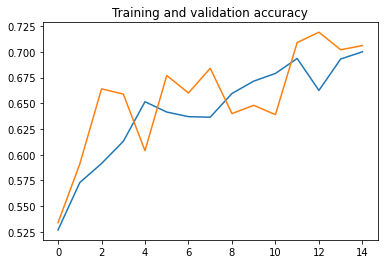

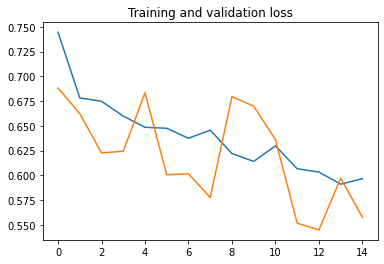

In [54]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc' ]
val_acc  = history.history['val_acc']
loss     = history.history['loss' ]
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs, loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

The **Loss and Accuracy** are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. **Loss Accuracy** is the portion of correct guesses or how well the network training is doing. The **Validation** accuracy is the measurement with the data that has not been used in training

## **Summary**
The results of the graph and the training data shows **training acc = 70%** and **validation acc = 71%** which translate no overfitting, model results were great.

The results of the graph and the training data shows **training loss = 60%** and **validation loss = 56%** which translate no overfitting, model results were great



### **Import image to check accuracy of dog or cat**

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving dog.13.jpg to dog.13.jpg
[1.]
dog.13.jpg is a dog
